In [27]:
# 데이터 구성 패키지 : Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt


import seaborn as sns

# 통계 분석 패키지
from scipy import stats
import scipy.stats
from scipy.stats import chi2_contingency

# 주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family='Malgun Gothic')

# 카이제곱 검정

In [57]:
#데이터 프레임 생성 
from scipy.stats import chi2_contingency
df=pd.DataFrame({'A/S':[18,8,4,4,3,3],
                 '가격':[1,2,1,1,1,25],
                 '성능':[8,14,3,2,3,8],
                 '확장성':[7,5,4,3,1,10],
                 '디자인':[9,9,5,7,1,1],
                 '기능성':[10,4,4,3,1,7]})

#chi-square test 실행 후 x축 y축 바꾸기
chi,pval,dof,expected=stats.chi2_contingency(df.T)

#chi-square test 결과 출력
print("cho-square test")
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pd freedom:{}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))
print("")
print("H0:각 제품에 대해 이미지 차이가 없다.")
print("H1:각 제품에 대해 이미지 차이가 있다.")
print("")
print("유의수준 5%에서 p-value값이 0으로 0.05보다 작으므로 각 제품에 대해 이미지 차이가 있다고 할 수 있다.")

cho-square test
chisq:80.478
p:0.000
degree pd freedom:25
expected value:
[[10.6    8.4    4.2    4.     2.    10.8  ]
 [ 8.215  6.51   3.255  3.1    1.55   8.37 ]
 [10.07   7.98   3.99   3.8    1.9   10.26 ]
 [ 7.95   6.3    3.15   3.     1.5    8.1  ]
 [ 8.48   6.72   3.36   3.2    1.6    8.64 ]
 [ 7.685  6.09   3.045  2.9    1.45   7.83 ]]

H0:각 제품에 대해 이미지 차이가 없다.
H1:각 제품에 대해 이미지 차이가 있다.

유의수준 5%에서 p-value값이 0으로 0.05보다 작으므로 각 제품에 대해 이미지 차이가 있다고 할 수 있다.


# One way ANOVA

In [20]:
#선형 모델 formula 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [58]:
#파일 불러오기 
df_1=pd.read_csv("/home/piai/바탕화면/강연주/수업/통계 이해/ANOVA.csv",engine='python')

#ANOVA 실행 
formula='time~C(gangjong)'
lm=ols(formula,df_1).fit()

#ANOVA 값 출력 
print(anova_lm(lm))
print("")
print("H0:2차정련 시간에 대해 이미지 차이가 없다.")
print("H1:2차정련 시간에 대해 이미지 차이가 있다.")
print("")
print("유의수준 5%에서 p-value값이 0.019으로 0.05보다 작으므로 2차정련 시간에 대해 이미지 차이가 있다고 할 수 있다.")

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN

H0:2차정련 시간에 대해 이미지 차이가 없다.
H1:2차정련 시간에 대해 이미지 차이가 있다.

유의수준 5%에서 p-value값이 0.019으로 0.05보다 작으므로 2차정련 시간에 대해 이미지 차이가 있다고 할 수 있다.


# 상관분석

In [60]:
#파일 불러오기
df_raw=pd.read_csv("/home/piai/Downloads/데이터/correlation.csv", engine='python')
df_raw.head()

#상관 분석 실행
corr,pval=stats.pearsonr(df_raw["strength"],df_raw["temp"])

#상관 분석 값 출력
print("Corrlation Analysis")
print("corr:{0:03f}".format(corr))
print("p-value:{0:0.3f}".format(pval))
print("")
print("두 변수의 연관성은 -89.9%로 강한 음의 상관 관계를 가지고 있다고 할 수 있다.")

Corrlation Analysis
corr:-0.899389
p-value:0.000

두 변수의 연관성은 -89.9%로 강한 음의 상관 관계를 가지고 있다고 할 수 있다.


# 단순선형회귀1

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           4.60e-51
Time:                        01:25:30   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

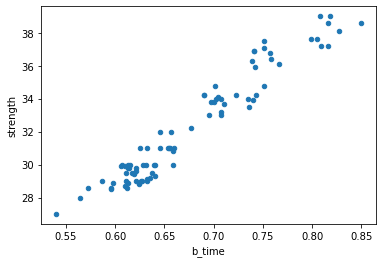

In [62]:
#파일 불러오기
df_raw=pd.read_csv("/home/piai/Downloads/데이터/correlation.csv", engine='python')

#선형 회귀 모델
from sklearn.linear_model import LinearRegression 

#선형 모델 formula (y~x...)
import statsmodels.formula.api as smf

#scatter plot 그리기
df_raw.plot.scatter(x="b_time",y="strength")

#Linear Regression 실행 
formula="strength~b_time" #"y~x"
model=smf.ols(formula, data=df_raw)

#적합
result=model.fit()

print(result.summary())
print()
print("H0: 정규성을 가진다.")
print("H1: 정규성을 가지지 않는다.")
print("")
print("회귀식은 strength=2.10+44.55*baking_time이고 회귀식에 대한 설명력은 93.3%이다.")
print("p-value는 0.05보다 작으므로 정규성을 따르지 않는다.")
print("Durbin-Watson값은 1.395로 0~4중 0에 가까우므로 양의 상관관계를 가짐을 알 수 있다.")

# 단순선형회귀2

In [64]:
df_raw=pd.read_csv("/home/piai/Downloads/데이터/correlation.csv", engine='python')

from sklearn.linear_model import LinearRegression 
import statsmodels.formula.api as smf
model=smf.ols(formula='strength~temp', data=df_raw)
result=model.fit()

print(result.summary())
print()
print("H0: 정규성을 가진다.")
print("H1: 정규성을 가지지 않는다.")
print("")
print("회귀식은 strength=44.22-0.51*temp이고 회귀식에 대한 설명력은 80.9%이다.")
print("p-value는 0.05보다 작으므로 정규성을 가지지 않는다고 볼 수 있다.")
print("Durbin-Watson값은 1.303로 0~4중 0에 가까우므로 양의 상관관계를 가짐을 알 수 있다.")

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     355.6
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           6.25e-32
Time:                        01:27:02   Log-Likelihood:                -152.78
No. Observations:                  86   AIC:                             309.6
Df Residuals:                      84   BIC:                             314.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.2198      0.657     67.339      0.0